In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')
import models.DWT2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD


1.15.0


In [2]:
nb_classes = 10
batch_size = 32
epochs = 30

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)  # CIFAR-10 60,000 32X32 color

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Remove images to get smaller dataset
# x_train = x_train[:1000, :, :]
# y_train = y_train[:1000]
# x_test = x_test[:500, :, :]
# y_test = y_test[:500]


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


In [3]:
# load DWT db2 model
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(models.DWT2.DWT(name="bior2.8"))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(models.DWT2.DWT(name="sym2"))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(nb_classes, activation="softmax"))
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dwt_bior2.8 (DWT)            (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 64)        73792     
_________________________________________________________________
dwt_1_sym2 (DWT)             (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________

In [4]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [5]:
history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 55s - loss: 1.7365 - acc: 0.4757 - val_loss: 0.5433 - val_acc: 0.8664
Epoch 2/30
48000/48000 - 52s - loss: 0.4975 - acc: 0.8502 - val_loss: 0.3184 - val_acc: 0.9107
Epoch 3/30
48000/48000 - 52s - loss: 0.3681 - acc: 0.8917 - val_loss: 0.2683 - val_acc: 0.9247
Epoch 4/30
48000/48000 - 52s - loss: 0.3126 - acc: 0.9091 - val_loss: 0.2347 - val_acc: 0.9340
Epoch 5/30
48000/48000 - 52s - loss: 0.2715 - acc: 0.9211 - val_loss: 0.2057 - val_acc: 0.9444
Epoch 6/30
48000/48000 - 53s - loss: 0.2394 - acc: 0.9298 - val_loss: 0.1900 - val_acc: 0.9467
Epoch 7/30
48000/48000 - 53s - loss: 0.2165 - acc: 0.9358 - val_loss: 0.1658 - val_acc: 0.9548
Epoch 8/30
48000/48000 - 52s - loss: 0.1953 - acc: 0.9431 - val_loss: 0.1509 - val_acc: 0.9582
Epoch 9/30
48000/48000 - 52s - loss: 0.1773 - acc: 0.9477 - val_loss: 0.1399 - val_acc: 0.9612
Epoch 10/30
48000/48000 - 52s - loss: 0.1654 - acc: 0.9514 - val_loss: 0.1313 - val_acc: 0.9641

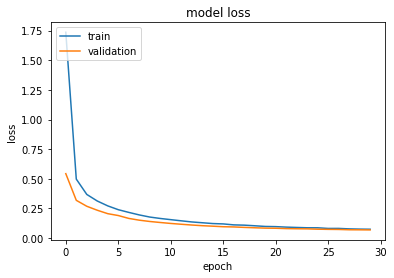

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()